In [43]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,GaussianNoise,UpSampling2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [45]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [46]:
input_shape=(28,28,1)
#Encoder 
input_img=Input(shape=input_shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x=GaussianNoise(0.5)(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
Encoded=MaxPooling2D((2,2),padding='same')(x)

In [47]:
#Decoder
x=Conv2D(8,(3,3),activation='relu',padding='same')(Encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),activation='relu')(x)
x=UpSampling2D((2,2))(x)
Decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


In [48]:
autoencoder=Model(input_img,Decoded)

In [49]:
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [50]:
history=autoencoder.fit(
    x_train,x_train,
    epochs=15,
    batch_size=32,
    validation_data=(x_test,x_test)
)    

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7998 - loss: 0.2271 - val_accuracy: 0.7789 - val_loss: 0.1802
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8089 - loss: 0.1240 - val_accuracy: 0.7877 - val_loss: 0.1635
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8103 - loss: 0.1126 - val_accuracy: 0.7950 - val_loss: 0.1440
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8114 - loss: 0.1070 - val_accuracy: 0.8019 - val_loss: 0.1265
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8117 - loss: 0.1040 - val_accuracy: 0.8051 - val_loss: 0.1171
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8116 - loss: 0.1018 - val_accuracy: 0.8070 - val_loss: 0.1116
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8122 - loss: 0.0998 - val_accuracy: 0.8091 - val_loss: 0.1049
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8126 - loss: 0.0988 - 

In [51]:
reconstructed=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


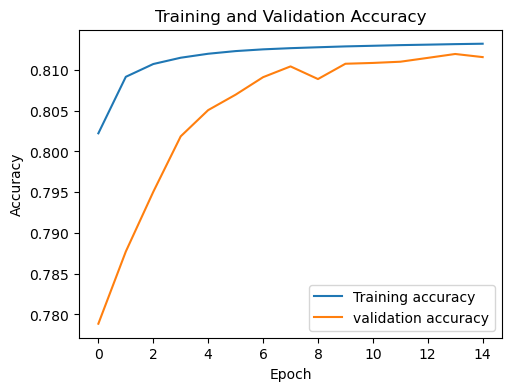

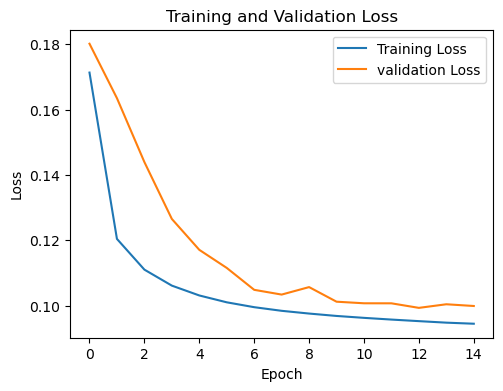

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

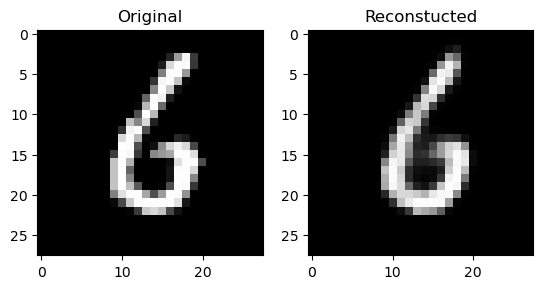

In [53]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(x_test[50],cmap='gray')
ax[1].imshow(reconstructed[50],cmap='gray')
ax[0].set_title("Original")
ax[1].set_title("Reconstucted")
plt.show()